In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [0]:
import numpy as np

<h2>Set up training data</h2>
As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. Since the task in this Codelab is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists celsius_q and fahrenheit_a that we can use to train our model.

In [0]:
celsius_q    = np.array([-46, -18,  0,  69, 42, 90,  206],  dtype=float)
fahrenheit_a = np.array([-50, 0, 32, 156, 107, 194, 402],  dtype=float)

<h2>Create the model</h2>
Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

Build a layer
We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

1. input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member.

2. units=1 — This specifies the number of neurons in the layer.

In [0]:
#Building a single layers with a single neuron(units) and a 1-D input(input_shape)
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

<h2>Assemble layers into the model</h2>
Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [0]:
#Assembling the layers into the model. Takes in a list of layers as an argument.
model = tf.keras.Sequential([l0])

#model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

<h2>Compile the model, with loss and optimizer functions</h2>
Before training, the model has to be compiled. When compiled for training, the model is given:

1. Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

2. Optimizer function — A way of adjusting internal values in order to reduce the loss.

In [0]:
#Compiling with the Loss Function and the Optimizer Function.
model.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.Adam(0.1))

The learning rate for the Optimizing Function can go from 0.001(default) to 0.1.

<h2>Train the model</h2>
Train the model by calling the <b>fit</b> method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [0]:
#Keep verbose False. No practical use(as of now). 
#Epoch kept very high because the small dataset.
trained_model = model.fit(celsius_q, fahrenheit_a, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`.

Text(0, 0.5, 'Loss')

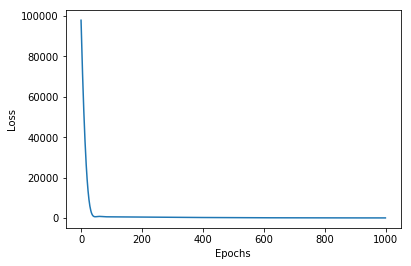

In [0]:
#Loss as compared to Epochs
import matplotlib.pyplot as plt
plt.plot(trained_model.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

## Predicted values and calculating accuracy of the model

In [0]:
predicted_values = model.predict([-40, -10,  0,  8, 15, 22,  38])
true_values = [-40,  14, 32, 46, 59, 72, 100]
predicted_values

array([[-43.308357],
       [ 11.059517],
       [ 29.182142],
       [ 43.680244],
       [ 56.36608 ],
       [ 69.05192 ],
       [ 98.04812 ]], dtype=float32)

In [0]:
MSE_error = tf.keras.losses.MSE(true_values, predicted_values)
MSE_error

<tf.Tensor: id=47162, shape=(7,), dtype=float32, numpy=
array([8748.976 , 2599.6433, 1863.5842, 1747.6755, 1991.1063, 2556.3982,
       5057.114 ], dtype=float32)>